# Facial Recognition -- Keras using CNN
## CalTech AIML Bootcamp -- Advanced Deep Learning & Computer Vision
### Weston Mauz
#### February 3, 2023

### Step 1) Import Data

In [61]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import AvgPool2D
from keras.layers import BatchNormalization
from keras.layers import Reshape
from tensorflow.keras import layers

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

import pandas as pd
import numpy as np

### Decided to go against loading npz file, as I was unfamiliar with this format

- Data was formatted into files that can be read from tf.keras.utils

In [62]:
# from numpy import load

# data = load('ORL_faces.npz')

# lst = data.files

# print(lst)

# for item in lst:
#     print(item)
#     print(data[item])

### Step 2) Load data from Kaggle dataset, reformatted

In [63]:
train_data = tf.keras.utils.image_dataset_from_directory(directory='data', validation_split=0.2, subset="training", seed=42, image_size=(111,92))

Found 410 files belonging to 41 classes.
Using 328 files for training.


In [64]:
val_data = tf.keras.utils.image_dataset_from_directory(directory='data', validation_split=0.2, subset="validation", seed=42, image_size=(111,92))

Found 410 files belonging to 41 classes.
Using 82 files for validation.


In [65]:
class_names = train_data.class_names
class_names

['1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '5',
 '6',
 '7',
 '8',
 '9']

In [66]:
import matplotlib.pyplot as plt

### Step 3) Visualize the data

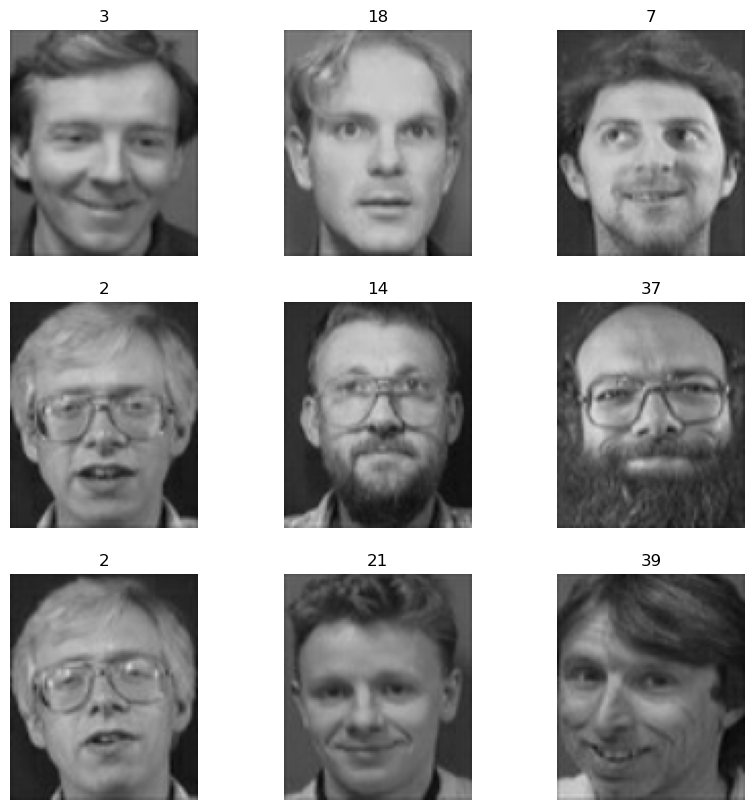

In [67]:
plt.figure(figsize=(10,10))
for images,labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

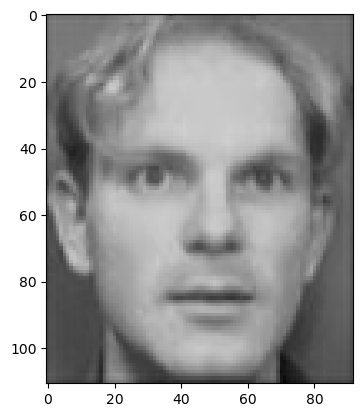

In [68]:
im = plt.imshow(images[1].numpy().astype("uint8"))

In [69]:
AUTOTUNE = tf.data.AUTOTUNE

### Step 4) Build the model

- CNN architecture that has been modified to produce the best results

In [70]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(111, 92, 3)),
  layers.Conv2D(filters=32, kernel_size = (5,5), padding='same', activation='relu'),
  layers.Conv2D(filters=32, kernel_size = (5,5), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(rate=0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(rate=0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [71]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 111, 92, 3)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 111, 92, 32)       2432      
                                                                 
 conv2d_17 (Conv2D)          (None, 111, 92, 32)       25632     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 55, 46, 32)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 55, 46, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 55, 46, 32)        9248      
                                                      

In [73]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

### Step 5) Train the model

- 10 epchs and running callback
- loss evaluated through cross-entropy & optimized on "adam"

In [74]:
epochs=10
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs,
  callbacks=[callback]
)

Epoch 1/10
11/11 [==============================] - 7s 623ms/step - loss: 3.7312 - accuracy: 0.0213 - val_loss: 3.7143 - val_accuracy: 0.0244
Epoch 2/10
11/11 [==============================] - 7s 624ms/step - loss: 3.7038 - accuracy: 0.0610 - val_loss: 3.7059 - val_accuracy: 0.0732
Epoch 3/10
11/11 [==============================] - 7s 609ms/step - loss: 3.5815 - accuracy: 0.0823 - val_loss: 3.6162 - val_accuracy: 0.0366
Epoch 4/10
11/11 [==============================] - 6s 585ms/step - loss: 3.1252 - accuracy: 0.1860 - val_loss: 3.0279 - val_accuracy: 0.1220
Epoch 5/10
11/11 [==============================] - 6s 589ms/step - loss: 2.2100 - accuracy: 0.4024 - val_loss: 1.7840 - val_accuracy: 0.4634
Epoch 6/10
11/11 [==============================] - 7s 600ms/step - loss: 0.8197 - accuracy: 0.7652 - val_loss: 0.6707 - val_accuracy: 0.8049
Epoch 7/10
11/11 [==============================] - 7s 606ms/step - loss: 0.3212 - accuracy: 0.9055 - val_loss: 1.1768 - val_accuracy: 0.7073
Epoch 

### First Model Attempt 
##### Same as CNN used for traffic sign recognition from previous project

- loss: 2.9705 - accuracy: 0.2012 - val_loss: 3.1770 - val_accuracy: 0.1585

### Second Model Attempt
##### Adding extra 2D convolutional layer for the model, increasing parameters up to 25632 from 2432 increased the accuracy of the model greatly

- loss: 1.9515 - accuracy: 0.4787 - val_loss: 1.6449 - val_accuracy: 0.6098

### Final Model
##### Adding extra epochs to the model gave the model much higher accuracy, hitting the target of 0.90

- loss: 0.0778 - accuracy: 0.9756 - val_loss: 0.2149 - val_accuracy: 0.9512

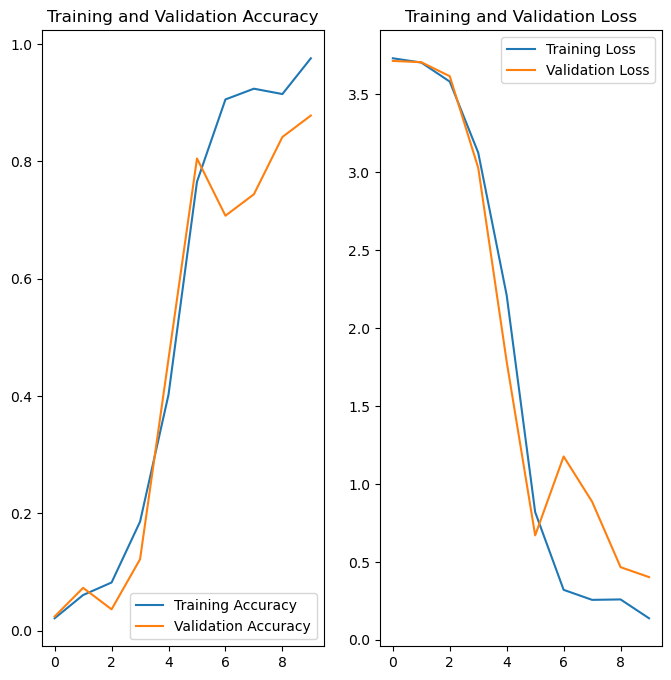

In [75]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Summary

This model had a steep learning curve, as it really gained momentum after 4 epochs in accuracy

### Final Evaluation Accuracy

- loss: 0.1387 
- accuracy: 0.9756 
- val_loss: 0.4029 
- val_accuracy: 0.8780